<a href="https://colab.research.google.com/github/Nick18899/mipt_labs/blob/main/Lab_1_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_excel('DZ1.xlsx', index_col=0, header=None, dtype={'Value': float})

In [ ]:
d = []
for i in range(0, len(data)):
  d.append(float(data.iloc[i].name))

In [ ]:
data = pd.DataFrame()
data['numbers'] = d
data

,numbers
0,498.36
1,500.70
2,499.70
3,500.39
4,499.64
...,...
265,501.52
266,499.19
267,498.39
268,499.49


In [ ]:
data['numbers'] = sorted(data['numbers'])

In [ ]:
data.index+=1
data

,numbers
1,497.24
2,497.25
3,497.45
4,497.60
5,497.65
...,...
266,503.15
267,503.18
268,503.36
269,503.46


In [ ]:
dR10 = (max(data['numbers']) - min(data['numbers']))/10
dR20 = (max(data['numbers']) - min(data['numbers']))/20

In [ ]:
print(dR10, dR20)
#print(list(data['numbers']))

0.8689999999999998 0.4344999999999999


In [ ]:
def numbersInGroups(dR, data, m):
  d = list(data['numbers'])
  res = [0]*m
  res[0] = 1
  for i in range(0, m+1):
    for j in d:
      if (min(d) + dR*(i))<j<=(min(d) + dR*(i+1)):
        res[i]+=1
  #print(res, sum(res))
  return res

In [ ]:
def omega(dR, data, m):
  d = list(data['dn'])
  print(len(d))
  res = [0]*m
  for i in range(0, m):
    res[i] = d[i]/(270*dR)
  #print(res)
  return res

In [ ]:
d = []
for i in range(0, 20):
   d.append(dR20 * i + min(data['numbers']))
#print(len(d), d)
table2 = pd.DataFrame()
table3 = pd.DataFrame()
table2['dn'] = numbersInGroups(dR20, data, 20)
table3['dn'] = numbersInGroups(dR10, data, 10)
table2['omega'] = omega(dR20, table2, 20)
table3['omega'] = omega(dR10, table3, 10)
table2['bondaries'] = d
d = []
for i in range(0, 10):
  d.append( dR10 * i + min(data['numbers']))
table3['bondaries'] = d
d = []
table2.index+=1
table3.index+=1
table2['omega * 1000'] = table2['omega'].apply(lambda x: round(x*1000, 2))
table3['omega * 1000'] = table3['omega'].apply(lambda x: round(x*1000, 2))
table2

20
10


,dn,omega,bondaries,omega * 1000
1,5,0.042620,497.2400,42.62
2,5,0.042620,497.6745,42.62
3,15,0.127861,498.1090,127.86
4,21,0.179005,498.5435,179.01
5,32,0.272770,498.9780,272.77
6,49,0.417679,499.4125,417.68
7,44,0.375059,499.8470,375.06
8,33,0.281294,500.2815,281.29
9,18,0.153433,500.7160,153.43
10,22,0.187529,501.1505,187.53


In [ ]:
averageResistence = sum(data['numbers'])/len(data)
round(averageResistence, ndigits=2)

500.05

In [ ]:
g = 0
for i in range(0, len(data)):
  g+=(data['numbers'].iloc[i] - averageResistence)**2

sigma = (g/len(data))**0.5
round(sigma, ndigits=2)

1.25

In [ ]:
from math import e
from math import pi

R = np.arange(495,506,0.001)
y = ((e)**(-((R - averageResistence)**2)/(2*sigma**2)))/(sigma * ((2*pi)**0.5))

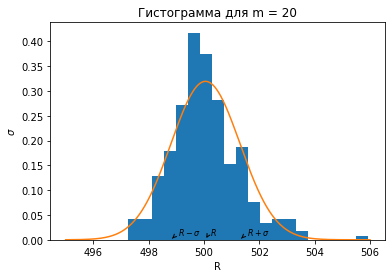

In [ ]:
plt.hist(list(data['numbers']), bins = 20, density = True)
plt.ylabel(r'$\sigma$')
plt.xlabel('R')
plt.title('Гистограмма для m = 20')
plt.annotate(r'$\ R - \sigma$', xy=[averageResistence - sigma,0],xycoords='data',
             xytext=[5,5],fontsize=8, textcoords='offset points', arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2"))
plt.annotate(r'$R$', xy=[averageResistence,0],xycoords='data',
             xytext=[5, 5],fontsize=8, textcoords='offset points', arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2"))
plt.annotate(r'$\ R + \sigma$', xy=[averageResistence + sigma,0],xycoords='data',
             xytext=[5,5],fontsize=8, textcoords='offset points', arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2"))
plt.plot(R,y)
plt.savefig('saved_figure20.png')
#plt.show()

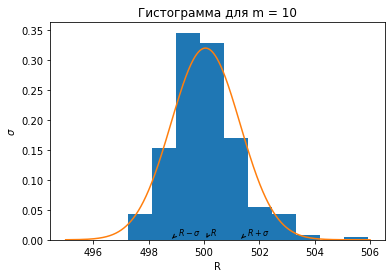

In [ ]:


plt.hist(list(data['numbers']), bins = 10, density = True)
plt.ylabel(r'$\sigma$')
plt.xlabel('R')
plt.title('Гистограмма для m = 10')
plt.annotate(r'$\ R - \sigma$', xy=[averageResistence - sigma,0],xycoords='data',
             xytext=[5,5],fontsize=8, textcoords='offset points', arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2"))
plt.annotate(r'$R$', xy=[averageResistence,0],xycoords='data',
             xytext=[5, 5],fontsize=8, textcoords='offset points', arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2"))
plt.annotate(r'$\ R + \sigma$', xy=[averageResistence + sigma,0],xycoords='data',
             xytext=[5,5],fontsize=8, textcoords='offset points', arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2"))
plt.plot(R,y)
plt.savefig('saved_figure.png')
#plt.show()